# **Imports**
---

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import datetime as dt

# **Introduction + Data analysis and visualization**
---

- Start time and end time
- plug and unplug
- end time vs unpluged 
- 

### **Load the data**
---

In [2]:
data = pd.read_csv('EVChargingStationUsage.csv')

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_64959/48901969.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('EVChargingStationUsage.csv')


### **Explore the data**
---

In [3]:
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [4]:
data.info()
print("-" * 100)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


### **Data cleaning**
---

#### **Missing Values**

In [5]:
missing_values = data.isnull().sum()
missing_values 
#data.fillna(value)  # You can choose different strategies for filling null values

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [6]:
# Fill missing values with specific strategies
data['Transaction Date (Pacific Time)'] = data['Transaction Date (Pacific Time)'].fillna(method='ffill')
data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])
data['EVSE ID'] = data['EVSE ID'].fillna('Unknown')
data['System S/N'] = data['System S/N'].fillna('Unknown')
data['Model Number'] = data['Model Number'].fillna('Unknown')
data['Currency'] = data['Currency'].fillna(data['Currency'].mode()[0])
data['Ended By'] = data['Ended By'].fillna(data['Ended By'].mode()[0])
data['Driver Postal Code'] = data['Driver Postal Code'].fillna('Unknown')
data['User ID'] = data['User ID'].fillna('Unknown')
data['County'] = data['County'].fillna('Unknown')

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_64959/3517198015.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Transaction Date (Pacific Time)'] = data['Transaction Date (Pacific Time)'].fillna(method='ffill')


In [7]:
data.isnull().sum()

Station Name                       0
MAC Address                        0
Org Name                           0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended By                           0
P

### **Descriptive Analysis**
---

In [8]:
# Energy Consumption Analysis:
total_energy = data['Energy (kWh)'].sum()
avg_energy = data['Energy (kWh)'].mean()
energy_by_station = data.groupby('Station Name')['Energy (kWh)'].sum().sort_values(ascending=False)

In [9]:
# Charging Time Analysis:
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])
avg_charging_time = data['Charging Time (hh:mm:ss)'].mean()
charging_time_by_station = data.groupby('Station Name')['Charging Time (hh:mm:ss)'].mean()

In [10]:
# Savings (GHG & Gasoline) Analysis:
total_ghg_savings = data['GHG Savings (kg)'].sum()
total_gasoline_savings = data['Gasoline Savings (gallons)'].sum()
ghg_savings_by_city = data.groupby('City')['GHG Savings (kg)'].sum().sort_values(ascending=False)

### **Time-Based Analysis**
---

<Axes: xlabel='hour'>

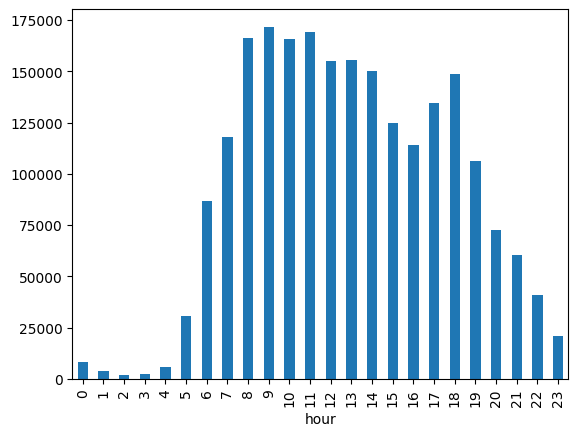

In [11]:
# Peak Usage Times:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['hour'] = data['Start Date'].dt.hour
energy_by_hour = data.groupby('hour')['Energy (kWh)'].sum()
energy_by_hour.plot(kind='bar')

<Axes: xlabel='month'>

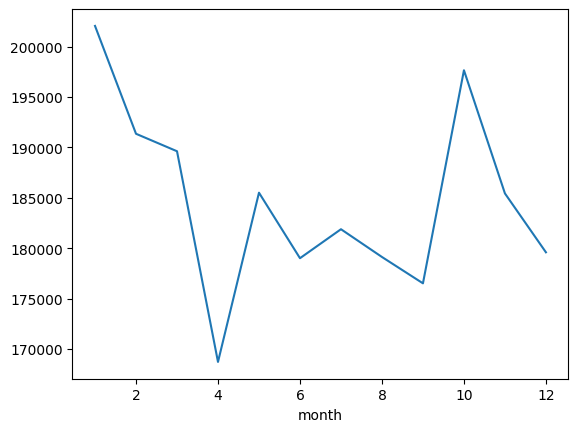

In [12]:
# Seasonal Trends:
data['month'] = data['Start Date'].dt.month
energy_by_month = data.groupby('month')['Energy (kWh)'].sum()
energy_by_month.plot(kind='line')

### **Location-Based Analysis**
---

In [13]:
# Popular Charging Stations:
sessions_by_station = data['Station Name'].value_counts()

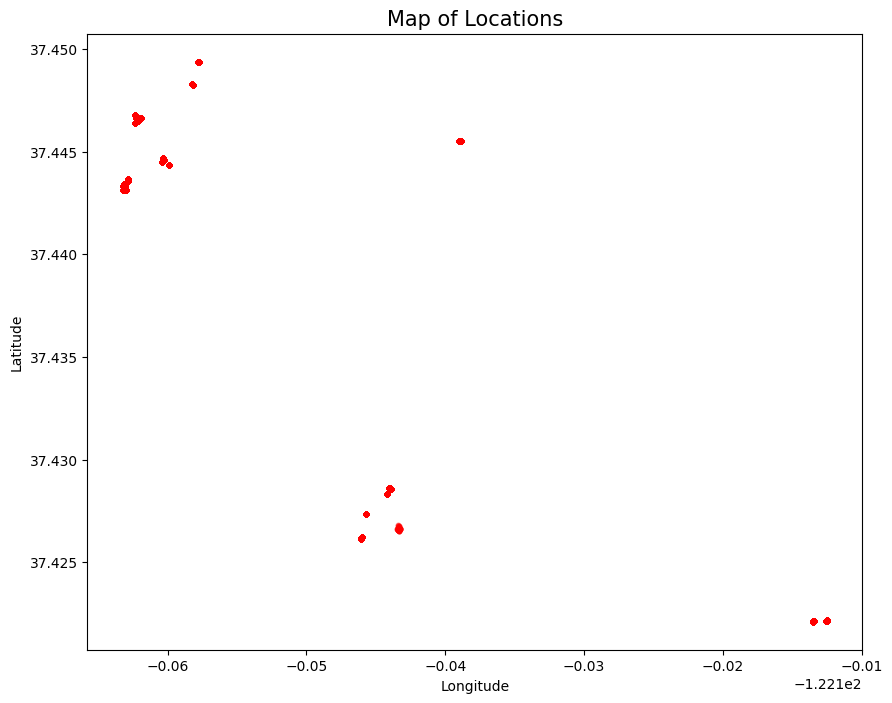

In [14]:
# Geospatial Analysis:
# Antag at df har kolonnerne 'Latitude' og 'Longitude'
plt.figure(figsize=(10, 8))

# Plot Latitude og Longitude som punkter
plt.scatter(data['Longitude'], data['Latitude'], c='red', s=10, alpha=0.5)

# Tilføj labels og titel
plt.title('Map of Locations', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Vis kortet
plt.show()

### **User-Based Analysis**
---

In [15]:
# Frequent Users:
sessions_by_user = data['User ID'].value_counts()

In [16]:
# User Behavior:
user_energy_consumption = data.groupby('User ID')['Energy (kWh)'].sum().sort_values(ascending=False)

### **Predictive Modeling (Advanced Analysis)**
---

In [17]:
# Energy Consumption Prediction:
X = data[['hour', 'Latitude', 'Longitude', 'Port Number']]  # Example feature set
y = data['Energy (kWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [18]:
data['Charging Time (seconds)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds()

In [19]:
# Clustering:

# Perform clustering using numeric columns
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data[['Energy (kWh)', 'Charging Time (seconds)']])

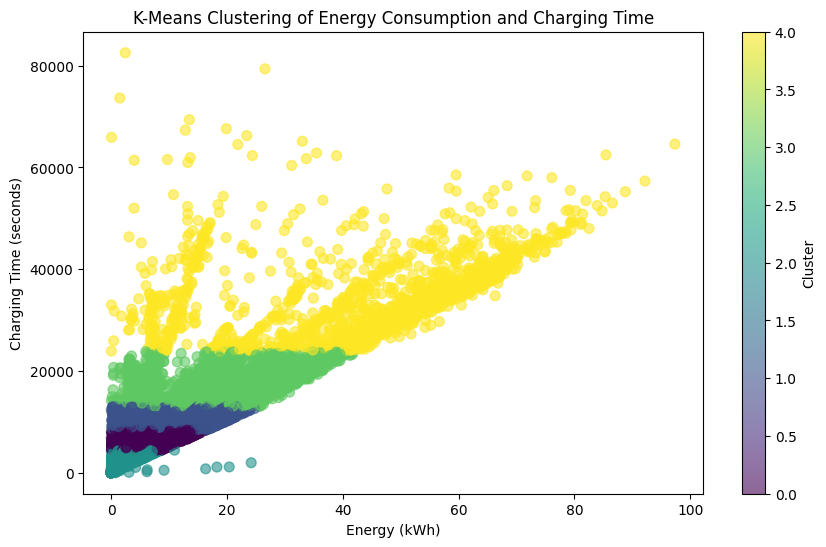

In [20]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Energy (kWh)'], data['Charging Time (seconds)'], c=data['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering of Energy Consumption and Charging Time')
plt.xlabel('Energy (kWh)')
plt.ylabel('Charging Time (seconds)')
plt.show()

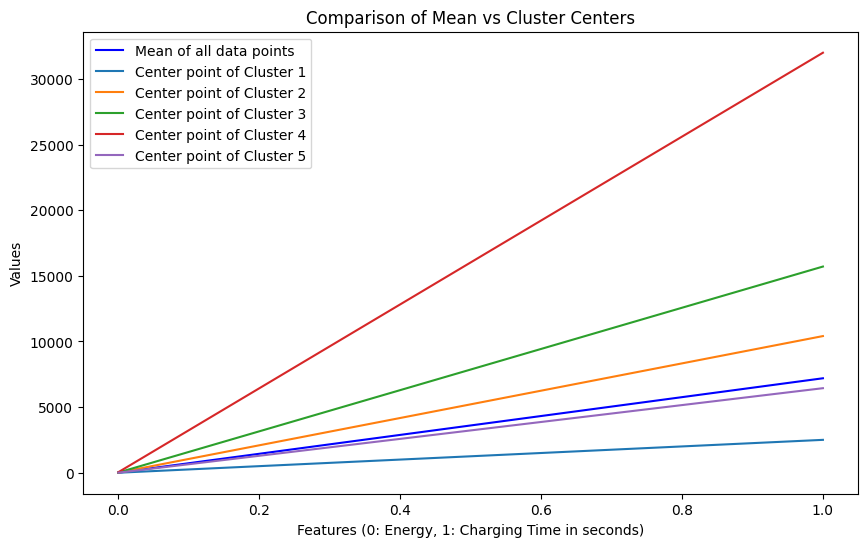

In [35]:
# Calculate the mean of the entire dataset for comparison
mean_energy = data['Energy (kWh)'].mean()
mean_charging_time = data['Charging Time (seconds)'].mean()

# Get cluster centers from KMeans model
cluster_centers = kmeans.cluster_centers_

# Plot the mean of all data points and cluster centers
plt.figure(figsize=(10, 6))

# Plot mean of all data points
plt.plot([mean_energy, mean_charging_time], label='Mean of all data points', color='blue')

# Plot the centers of each cluster
for i, center in enumerate(cluster_centers):
    plt.plot(center, label=f'Center point of Cluster {i + 1}')

# Adding labels and legend
plt.xlabel('Features (0: Energy, 1: Charging Time in seconds)')
plt.ylabel('Values')
plt.legend()
plt.title('Comparison of Mean vs Cluster Centers')
plt.show()

---

In [240]:
# Convert 'Start Date' and 'End Date' using 'errors=coerce' to convert invalid values to NaT (Not a Time)
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'], errors='coerce')

# Verify the conversion
print(data[['Start Date', 'End Date']].head())

           Start Date            End Date
0 2011-07-29 20:17:00 2011-07-29 23:20:00
1 2011-07-30 00:00:00 2011-07-30 00:02:00
2 2011-07-30 08:16:00 2011-07-30 12:34:00
3 2011-07-30 14:51:00 2011-07-30 16:55:00
4 2011-07-30 18:51:00 2011-07-30 20:03:00


In [235]:
#Total duration
duration = data['End Date'] - data['Start Date']
duration = duration.dt.total_seconds() / 3600
energy_hourly = data['Energy (kWh)'] / duration
print(energy_hourly[:5])

0    2.049002
1    3.197640
2    3.477157
3    3.464343
4    1.631471
dtype: float64


In [242]:
#Actual time charging
actual_duration = data['Charging Time (hh:mm:ss)']
actual_duration = actual_duration.dt.total_seconds() / 3600

energy_hourly_actual = data['Energy (kWh)'] / actual_duration

In [206]:
time_range = pd.date_range(data['Start Date'].min(), data['End Date'].max(), freq='H')
time_range

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_1641/1954554641.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(data['Start Date'].min(), data['End Date'].max(), freq='H')


DatetimeIndex(['2011-07-29 20:17:00', '2011-07-29 21:17:00',
               '2011-07-29 22:17:00', '2011-07-29 23:17:00',
               '2011-07-30 00:17:00', '2011-07-30 01:17:00',
               '2011-07-30 02:17:00', '2011-07-30 03:17:00',
               '2011-07-30 04:17:00', '2011-07-30 05:17:00',
               ...
               '2021-01-04 11:17:00', '2021-01-04 12:17:00',
               '2021-01-04 13:17:00', '2021-01-04 14:17:00',
               '2021-01-04 15:17:00', '2021-01-04 16:17:00',
               '2021-01-04 17:17:00', '2021-01-04 18:17:00',
               '2021-01-04 19:17:00', '2021-01-04 20:17:00'],
              dtype='datetime64[ns]', length=82729, freq='h')

In [169]:
Energy = data['Energy (kWh)']
Energy

KeyError: 'Energy (kWh)'

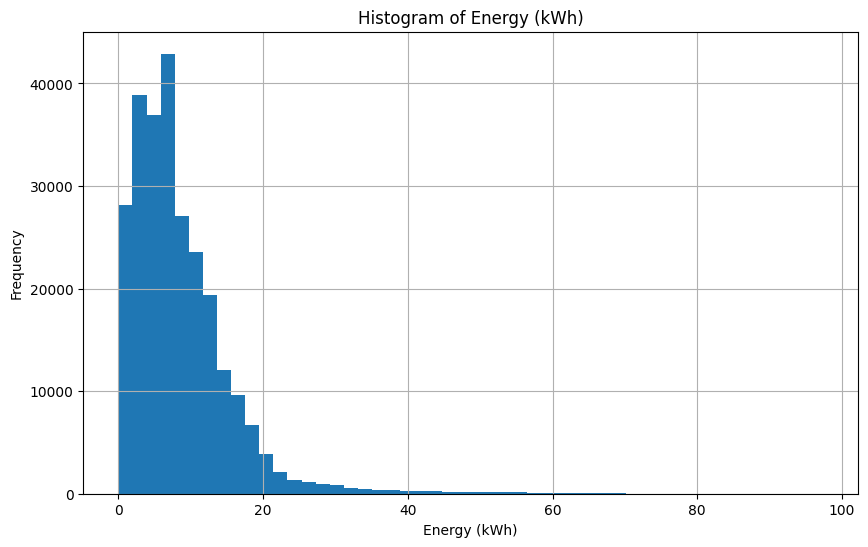

In [159]:
Energy.hist(bins=50, figsize=(10, 6))

plt.title('Histogram of Energy (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

plt.show()

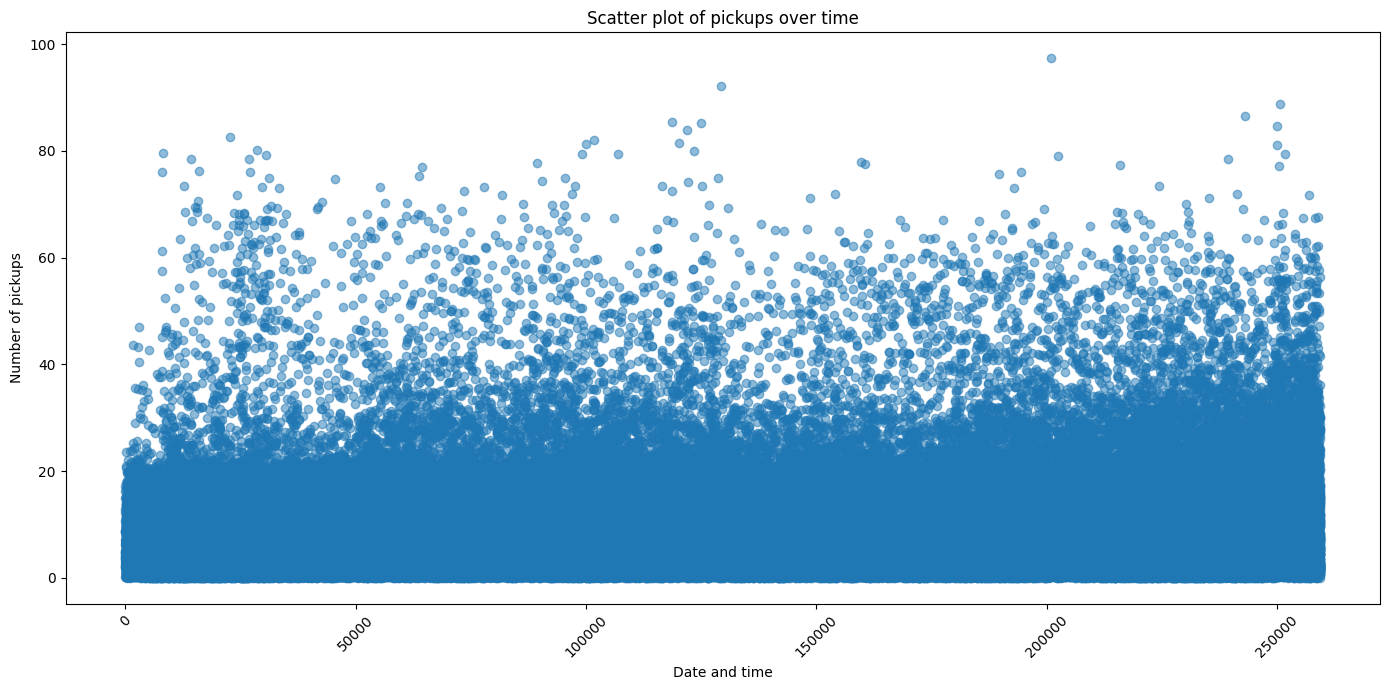

In [160]:
plt.figure(figsize=(14, 7)) 

plt.scatter(data.index, data['Energy (kWh)'], alpha=0.5)
plt.title('Scatter plot of pickups over time')
plt.xlabel('Date and time')
plt.ylabel('Number of pickups')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [161]:
energy_normalized = (Energy - Energy.mean()) / Energy.std()

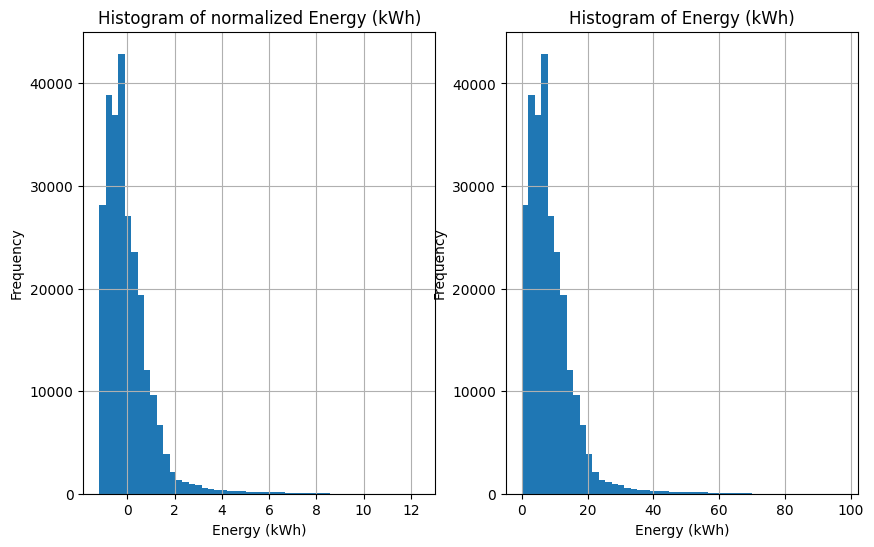

In [162]:
plt.subplot(1, 2, 1)
energy_normalized.hist(bins=50, figsize=(10, 6))
plt.title('Histogram of normalized Energy (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Energy.hist(bins=50, figsize=(10, 6))

plt.title('Histogram of Energy (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

plt.show()

<Axes: >

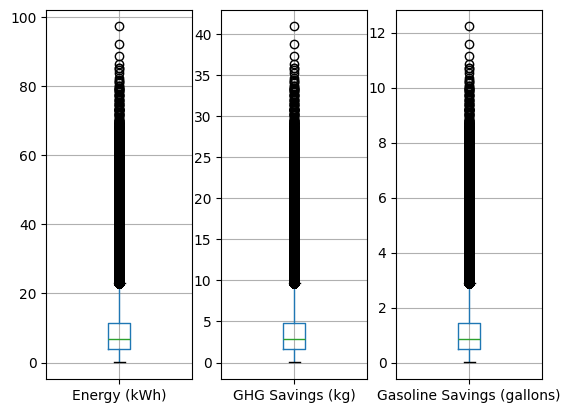

In [163]:
# Checking for outliers 
plt.subplot(1, 3, 1)
data.boxplot(column='Energy (kWh)', figsize=(5, 5))

plt.subplot(1, 3, 2)
data.boxplot(column='GHG Savings (kg)', figsize=(5, 5))

plt.subplot(1, 3, 3)
data.boxplot(column='Gasoline Savings (gallons)', figsize=(5, 5))

In [164]:
def find_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the results
    print(f"Number of outliers in {column}: {outliers.shape[0]} out of {df.shape[0]} observations")
    #print(f"Outliers located at:\n{outliers.index.tolist()}")
    
    return outliers

outliers = find_outliers_iqr(data, 'Energy (kWh)')
outliers = find_outliers_iqr(data, 'GHG Savings (kg)')
outliers = find_outliers_iqr(data, 'Gasoline Savings (gallons)')
outliers = find_outliers_iqr(data, 'Fee')



Number of outliers in Energy (kWh): 8696 out of 259415 observations
Number of outliers in GHG Savings (kg): 8692 out of 259415 observations
Number of outliers in Gasoline Savings (gallons): 8697 out of 259415 observations
Number of outliers in Fee: 14371 out of 259415 observations


## **Mandatory Component**
---

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     259415 non-null  object        
 1   MAC Address                      259415 non-null  object        
 2   Org Name                         259415 non-null  object        
 3   Start Date                       259415 non-null  datetime64[ns]
 4   Start Time Zone                  259415 non-null  object        
 5   End Date                         259375 non-null  datetime64[ns]
 6   End Time Zone                    259415 non-null  object        
 7   Transaction Date (Pacific Time)  259206 non-null  object        
 8   Total Duration (hh:mm:ss)        259415 non-null  object        
 9   Charging Time (hh:mm:ss)         259415 non-null  object        
 10  Energy (kWh)                     259415 non-

### **1: Cluster**

- Night vs day
- Weekday vs weekend
- Morning vs afternoon vs evening
- Location (longitude x latitude)
- Model number
- Port type


### **2: Prediction model**

## **Exploratory Component**
---

### **1: Infrastructure planning**

### **2: Campaigns to increase**

# **Conclusions**
---

# **Word Count**
---

In [166]:
import json

with open('Project.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'markdown', 'metadata': {}, 'source': ['# **Imports**\n', '---']}, {'cell_type': 'code', 'execution_count': 146, 'metadata': {}, 'outputs': [], 'source': ['import numpy as np\n', 'import pandas as pd\n', 'import matplotlib.pyplot as plt\n', 'from datetime import datetime, timedelta']}, {'cell_type': 'markdown', 'metadata': {}, 'source': ['# **Introduction + Data analysis and visualization**\n', '---']}, {'cell_type': 'code', 'execution_count': 147, 'metadata': {}, 'outputs': [{'ename': 'KeyboardInterrupt', 'evalue': '', 'output_type': 'error', 'traceback': ['\x1b---------------------------------------------------------------------------\x1b', '\x1bKeyboardInterrupt\x1b                         Traceback (most recent call last)', "Cell \x1bIn[147], line 1\x1b\n\x1b----> 1\x1b data \x1b=\x1b \x1bpd\x1b\x1b.\x1b\x1bread_csv\x1b\x1b(\x1b\x1b'\x1b\x1bEVChargingStationUsage.csv\x1b\x1b'\x1b\x1b)\x1b\n", 'File \x1b/Library/Frameworks/Python.framework/Versions/3.11/lib/

In [167]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

32
